In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [5]:
Total count of values
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#Sum of null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
#City data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
#Get Unique values on the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
#Sum of "urban"
sum(city_data_df['type']=="Urban")

66

In [12]:
#Sum of 'suburban'
sum(city_data_df['type']=="Suburban")

36

In [13]:
#Sum of 'rural'
sum(city_data_df['type']=="Rural")

18

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [16]:
#Combine the 2 data fracmes into one.  Use the 'city' column as the overlapping data.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
#Display the new DF
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [17]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [19]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [20]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [21]:
#Get the number of rides for urban cities using groupby
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
#Get the number of rides for Suburban cities using groupby
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
#Get the number of rides for Rural cities using groupby
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [25]:
Average fare by city (urban)
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
#Average fare by city (suburban)
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [29]:
#Average fare by city (rural)
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [32]:
#Average number of drivers for each city (Urban)
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [33]:
#Average number of drivers for each city (Suburban)
suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [34]:
#Average number of drivers for each city (Rural)
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

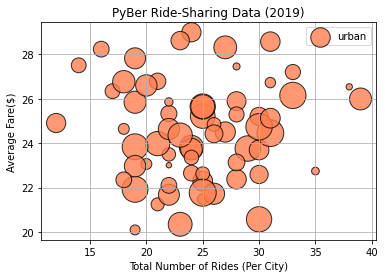

In [39]:
#Urban cities bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, c="coral", edgecolor="black", 
            linewidth=1, alpha=0.8, label="urban")
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

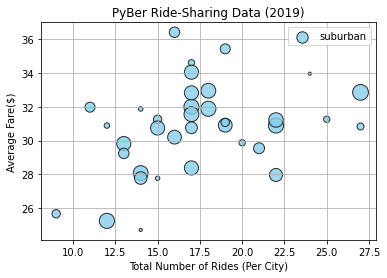

In [40]:
#Suburban cities bubble chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_drivers, c="skyblue", edgecolor="black", 
            linewidth=1, alpha=0.8, label="suburban")
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

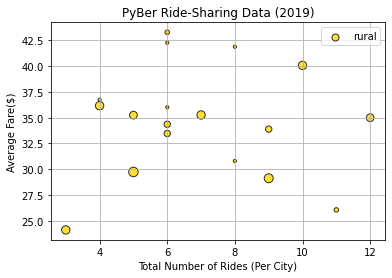

In [41]:
#Rural cities bubble chart
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, c="gold", edgecolor="black", 
            linewidth=1, alpha=0.8, label="rural")
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

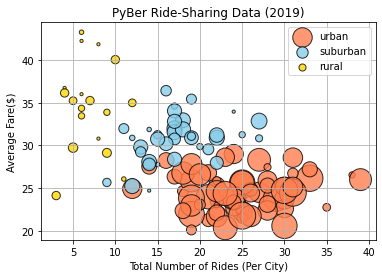

In [42]:
#To combine the previous charts into one, combine them into one cell and run the cell:

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, c="coral", edgecolor="black", 
            linewidth=1, alpha=0.8, label="urban")
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_drivers, c="skyblue", edgecolor="black", 
            linewidth=1, alpha=0.8, label="suburban")
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, c="gold", edgecolor="black", 
            linewidth=1, alpha=0.8, label="rural")
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

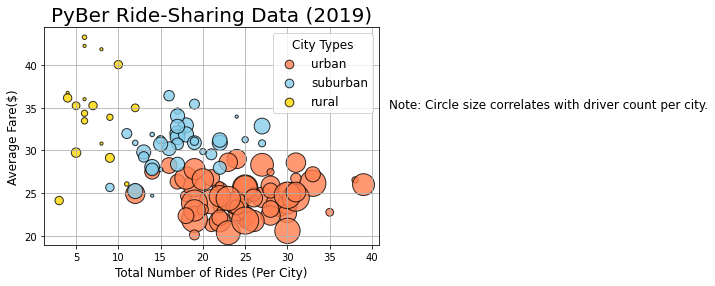

In [53]:
#Clean up the code by taking individual functions and combining them into one: (Also change some formatting, and legend sizes)
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, c="coral", edgecolor="black", 
            linewidth=1, alpha=0.8, label="urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_drivers, c="skyblue", edgecolor="black", 
            linewidth=1, alpha=0.8, label="suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, c="gold", edgecolor="black", 
            linewidth=1, alpha=0.8, label="rural")

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare($)', fontsize=12)
plt.grid(True)

#Make legend Markers the same size and adjust the legend as needed
lgnd=plt.legend(fontsize="12", mode='Expanded', scatterpoints=1,loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size on the right side of the chart(42,35 is x and y location)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Save the chart to a folder
plt.savefig("Fig1.png")

In [54]:
#Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [55]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [56]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [57]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [58]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [59]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [60]:
#calculate mean of ride count for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [61]:
#Calculate the mode of ride count for each city type
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [62]:
#Calculate the mode of ride count for each city type
round(urban_ride_count.mode(),2),round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [65]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [70]:
#Calculate the measures of central tendancy for ride count in urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"the mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print (f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
       
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

the mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [71]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [72]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [74]:
#Get the fares for urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [76]:
#Calculate the measure of central tendancy for the fares in urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"the mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"the median price for urban trips is{median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is{mode_urban_fares}.")


the mean fare price for urban trips is $24.53.
the median price for urban trips is24.64.
The mode fare price for urban trips isModeResult(mode=array([22.86]), count=array([5])).


In [78]:
#Get the fares for suburban cities
suburban_fares=suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [79]:
#Get the fares for rural cities
rural_fares=rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [80]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"the mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

the mean fare price for suburban trips is $30.97.


In [82]:
mean_rural_fares = np.mean(rural_fares)
print(f"the mean fare price for rural trips is ${mean_rural_fares:.2f}.")

the mean fare price for rural trips is $34.62.


In [83]:
#Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [95]:
#Urban Drivers Statistics
urban_drivers_mean=urban_drivers.mean()
print(f"The mean number of urban drivers is {urban_drivers_mean:.2f}")

urban_drivers_median=urban_drivers.median()
print(f"The median number of urban drivers is {urban_drivers_median:.2f}")

urban_drivers_mode=sts.mode(urban_drivers)
print(urban_drivers_mode)

The mean number of urban drivers is 36.68
The median number of urban drivers is 37.00
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [90]:
#Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [96]:
#subUrban Drivers Statistics
suburban_drivers_mean=suburban_drivers.mean()
print(f"The mean number of suburban drivers is {suburban_drivers_mean:.2f}")

suburban_drivers_median=suburban_drivers.median()
print(f"The median number of suburban drivers is {suburban_drivers_median:.2f}")

suburban_drivers_mode=sts.mode(suburban_drivers)
print(suburban_drivers_mode)

The mean number of suburban drivers is 13.71
The median number of suburban drivers is 16.00
ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [97]:
#Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [98]:
#subUrban Drivers Statistics
rural_drivers_mean=rural_drivers.mean()
print(f"The mean number of rural drivers is {rural_drivers_mean:.2f}")

rural_drivers_median=rural_drivers.median()
print(f"The median number of rural drivers is {rural_drivers_median:.2f}")

rural_drivers_mode=sts.mode(rural_drivers)
print(rural_drivers_mode)

The mean number of rural drivers is 4.30
The median number of rural drivers is 4.00
ModeResult(mode=array([1], dtype=int64), count=array([32]))


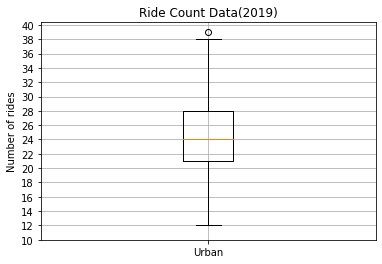

In [101]:
#Create a box and whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#Add title, y axis label and grid
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

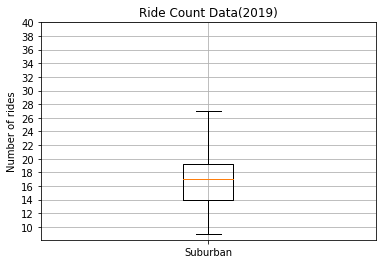

In [102]:
#Create a box and whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#Add title, y axis label and grid
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

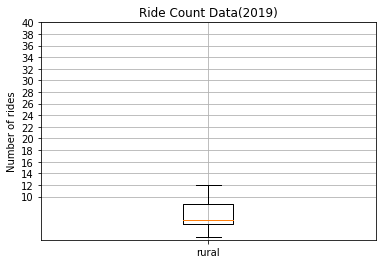

In [103]:
#Create a box and whisker plot for the rural cities ride count
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#Add title, y axis label and grid
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

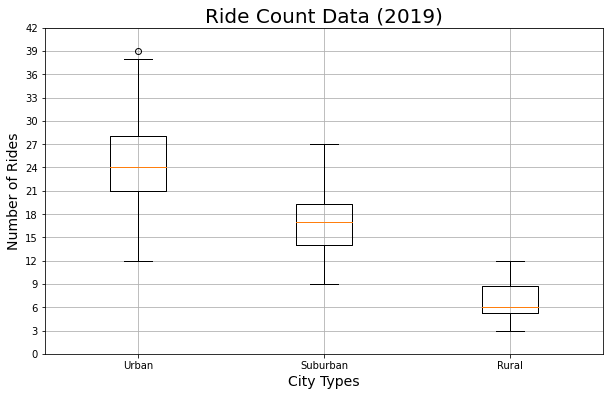

In [104]:
#Combine the previous three box and whiskers into one

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [105]:
# Get the city that matches 39.(Outlier on the previous graph)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


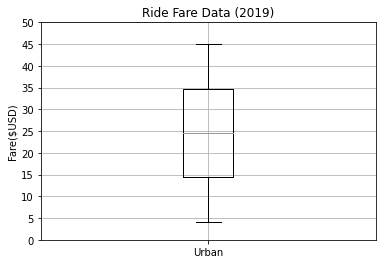

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [106]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

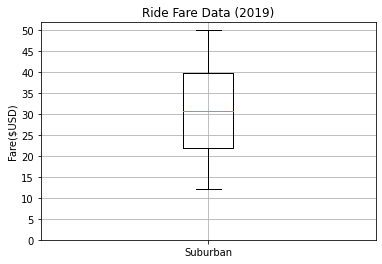

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [107]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

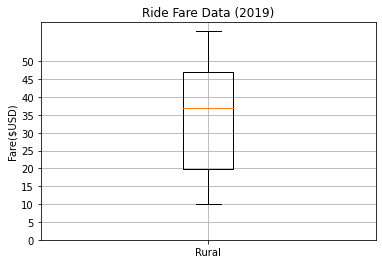

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [108]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

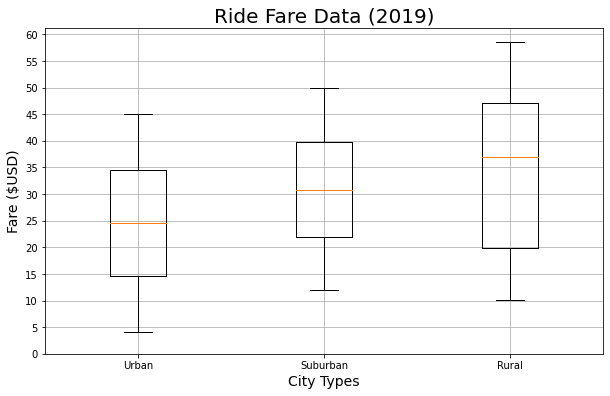

In [111]:
#Combine the 3 previous charts into one:
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

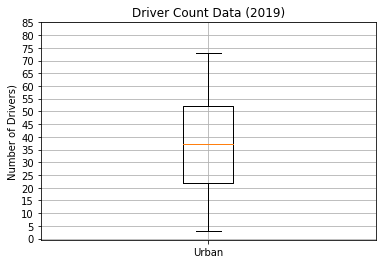

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [112]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

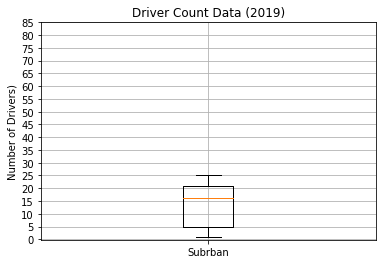

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [113]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

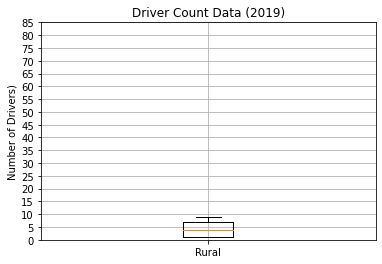

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [114]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

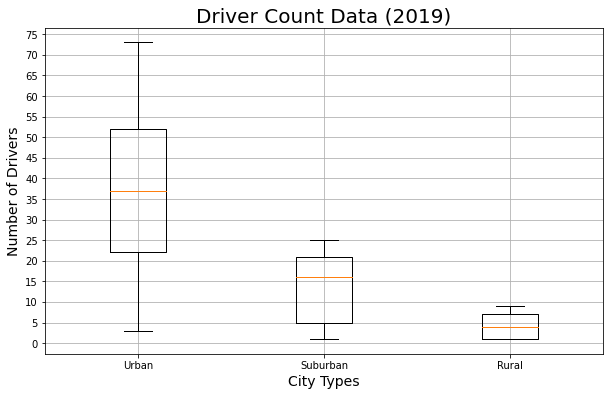

In [120]:
#Combine the 3 previous charts into one:

x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()